In [1]:
%matplotlib inline
import pandas as pd

In [2]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [3]:
titles = pd.DataFrame.from_csv('data/titles.csv', index_col=None, encoding = 'utf-8')
titles.head()

,title,year
0,The Rising Son,1990
1,The Thousand Plane Raid,1969
2,Crucea de piatra,1993
3,Country,2000
4,Gaiking II,2011


In [5]:
cast = pd.read_csv('data/cast.csv', index_col=None)
cast.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


### Define a year as a "Superman year" whose films feature more Superman characters than Batman. How many years in film history have been Superman years?

In [35]:
c = cast[(cast.character == 'Superman') | (cast.character == 'Batman')]
c = c.groupby(['character', 'year']).size()
c = c.unstack(0).fillna(0)
len(c[c.Superman > c.Batman])

11

### How many years have been "Batman years", with more Batman characters than Superman characters?

In [38]:
c = cast[(cast.character == 'Batman') | (cast.character == 'Superman')]
c = c.groupby(['character','year']).size()
c = c.unstack(0).fillna(0)
len(c[c.Batman > c.Superman])

26

### Plot the number of actor roles each year and the number of actress roles each year over the history of film.

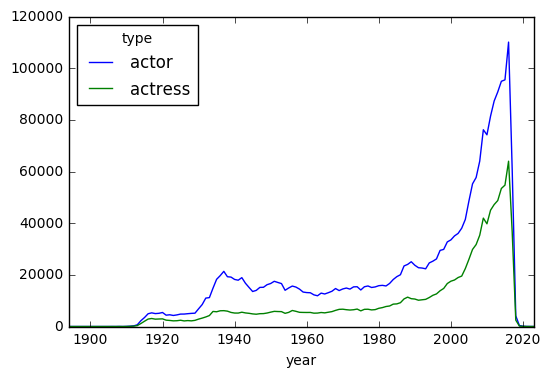

In [45]:
c = cast
c = c.groupby(['type','year']).size()
c = c.unstack(0).fillna(0)
c.plot()

### Plot the number of actor roles each year and the number of actress roles each year, but this time as a kind='area' plot.

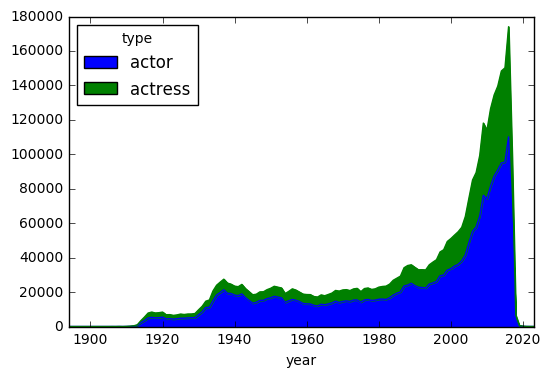

In [47]:
c = cast
c = c.groupby(['type','year']).size()
c = c.unstack('type')
c.plot(kind = 'area')

### Plot the difference between the number of actor roles each year and the number of actress roles each year over the history of film.

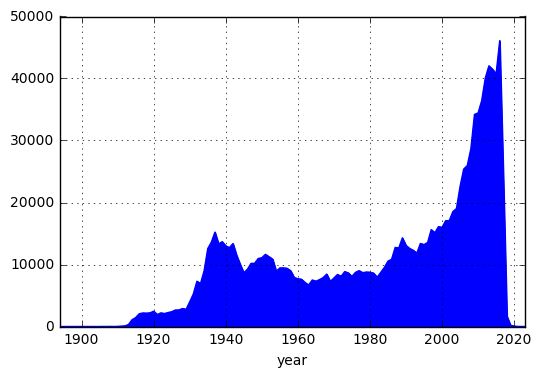

In [55]:
c = cast
c = c.groupby(['type','year']).size().unstack('type').fillna(0)
(c.actor - c.actress).plot(kind = 'area', grid = True)

### Plot the fraction of roles that have been 'actor' roles each year in the hitsory of film.

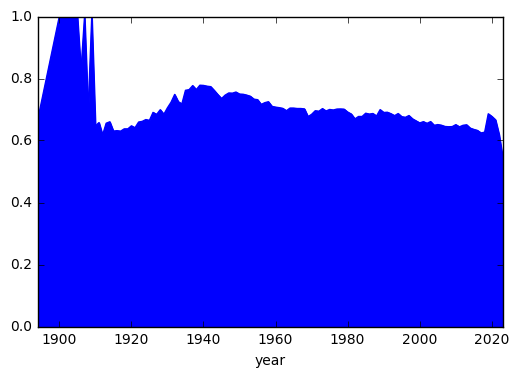

In [63]:
c = cast.groupby(['type','year']).size().unstack('type').fillna(0)
(c.actor / (c.actor + c.actress)).plot(kind = 'area', ylim = [0,1])

### Plot the fraction of supporting (n=2) roles that have been 'actor' roles each year in the history of film.

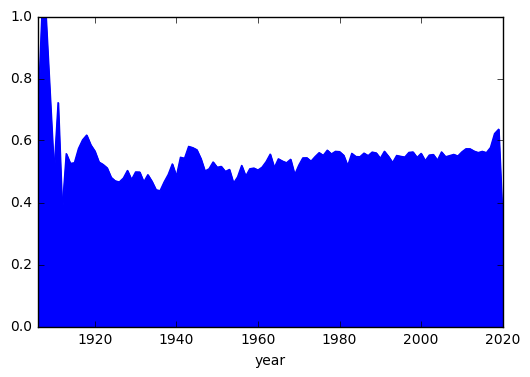

In [65]:
c = cast[cast.n == 2].groupby(['type','year']).size().unstack('type').fillna(0)
(c.actor / (c.actor + c.actress)).plot(kind = 'area')

### Build a plot with a line for each rank n=1 through n=3, where the line shows what fraction of that rank's roles were 'actor' roles for each year in the history of film.

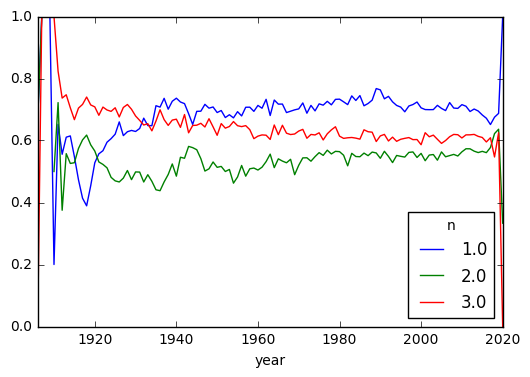

In [76]:
c = cast[cast.n <= 3].groupby(['type','year','n']).size()
c = c.unstack('type').fillna(0)
c = c.actor / (c.actor + c.actress)
c = c.unstack('n')
c.plot()